# Import functions

In [4]:
%matplotlib inline
%matplotlib notebook

import astropy.constants as constant
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import random as rdm
import scipy.integrate as integrate
from matplotlib import rcParams

# Calculate $d$

In [5]:
def integral(z):
    return 1 / np.sqrt(Omega_Lambda + Omega_m * (1 + z) ** 3)

Omega_Lambda = 0.74
Omega_m = 1 - Omega_Lambda
h = 0.71
H0 = 100 * h

z1s = [0.143, 0.72, 2.145, 0.265, 0.334, 1.345, 0.7957, 1.545, 1.066, 1.722, 0.351, 0.178, 0, 0, 0.925, 0.638, 0.688, 0.668, 1.362, 0.207, 1.014, 0.496, 0.153, 0.15, 0.174, 0.14119, 2.471, 1.0831, 1.059, 2.19257]
d = []

for z in z1s:
    d.append((constant.c / H0) * integrate.quad(integral, 0, z))

# Load data

In [6]:
my_data = np.genfromtxt('radio-to-gamma-ray-correlation-1.txt', delimiter = ',', dtype = None, names = True)

count = my_data['Count'].tolist()
radio = my_data['Srv_1']
gamma = my_data['SgE0_1']

# Run Monte Carlo simulations

In [7]:
r_distribution = []
N = 26
simulations = int(1e7)

for i in range(simulations):
    if i % 1e6 == 0 and i  > 0:
        print('1,000,000 done...')
    samples = rdm.sample(count, N)
    random_radio, random_gamma = [], []

    for sample in samples:
        random_radio.append(np.log(radio[sample]))
        random_gamma.append(np.log(gamma[sample]))

    r_distribution.append(np.corrcoef(random_radio, random_gamma)[1, 0])

1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...
1,000,000 done...


# Turn $r$ values into $|r|$

In [8]:
r_absolute = []

for r in r_distribution:
    r_absolute.append(abs(r))

# See where my $r$ stands

In [9]:
mine = np.genfromtxt('radio-to-gamma-ray-correlation-2.txt', delimiter = ',', dtype = None, names = True)

my_radio = mine['Srv']
my_gamma = mine['SgE0']

my_log_radio, my_log_gamma = [], []

for i in range(len(my_radio)):
    my_log_radio.append(np.log(my_radio[i]))
    my_log_gamma.append(np.log(my_gamma[i]))
    
my_r = np.corrcoef(my_log_radio, my_log_gamma)[1, 0]
less_than = 0

for r in r_absolute:
    if my_r < r:
        less_than += 1

print('My r is ' + str(round(my_r, 2)) + ' with ' + str(round(less_than / simulations, 3)) + ' significance.')

My r is 0.56 with 0.059 significance.


# Plot my significance against the simulations

<IPython.core.display.Javascript object>


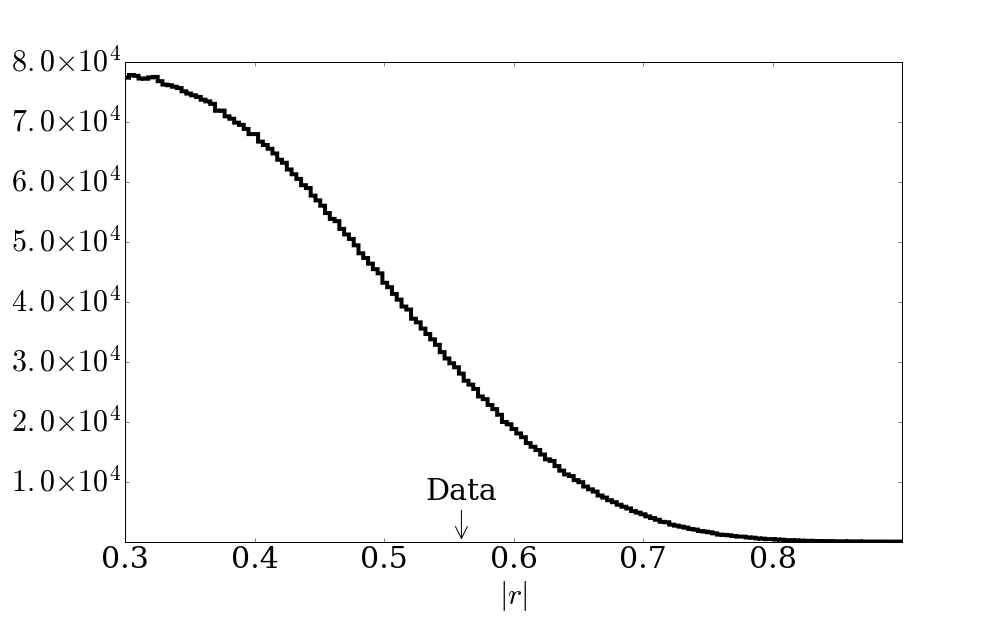

In [10]:
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize = (13.92, 8.60))

plt.hist(r_absolute, cumulative = False, bins = 250, fill = False, histtype = 'step', color = 'black', lw = 4)

class MathTextSciFormatter(mticker.Formatter):
    def __init__(self, fmt = '%1.1e'):
        self.fmt = fmt
        
    def __call__(self, x, pos = None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)

plt.xlabel(r'$|r|$', fontsize = 30, color = 'black')
plt.ylabel(r'$N$', fontsize = 30, color = 'black')
plt.gca().yaxis.set_major_formatter(MathTextSciFormatter('%1.1e'))
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)

plt.xticks(fontsize = 30, color = 'black')
plt.yticks(fontsize = 30, color = 'black')
plt.annotate('Data', size = 30, xy = (my_r, 0), xytext = (my_r, 7000), horizontalalignment = 'center', arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))
plt.xlim(0.3, 0.9)

plt.savefig('radio-to-gamma-ray-correlation.pdf', bbox_inches = 'tight', format = 'pdf')
plt.show()